# Gráficos com Matplotlib

In [411]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(15,8))

In [412]:
dados = pd.read_csv('../dados/aluguel2.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


## Criar uma área com vários gráficos

In [413]:
area = plt.figure()

<Figure size 1080x576 with 0 Axes>

### Colocando 4 gráficos dentro dessa área

In [414]:
# sigfinica que na área terão 4 gráficos
# 2 linhas, 2 colunas e este estará na posição 1
g1 = area.add_subplot(2, 2, 1)
# fazendo para os outros gráficos
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

### Criando gráficos de dispersão

In [415]:
# cria um gráfico de dispersão, com as variáveis passadas
g1.scatter(dados.Valor, dados.Area)
# cria um título para o gráfico
g1.set_title('Valor x Área')

Text(0.5, 1.0, 'Valor x Área')

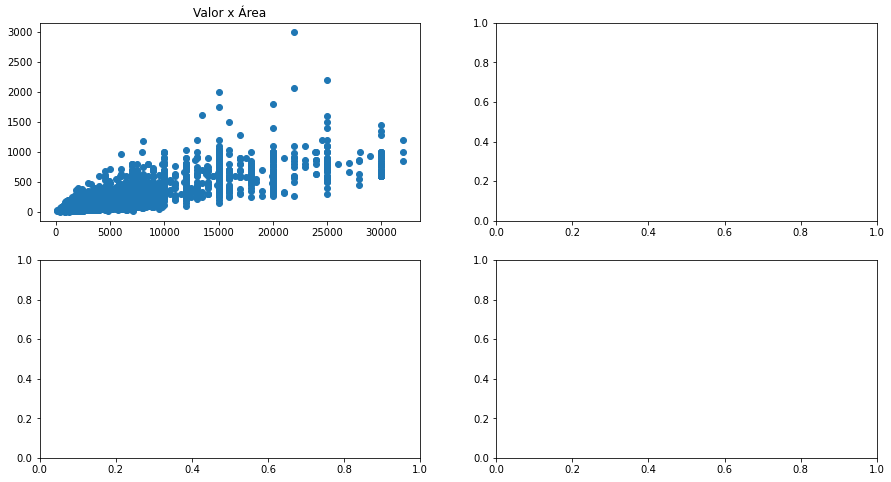

In [416]:
area

### Criando um gráfico de histograma

In [417]:
g2.hist(dados.Valor)
g2.set_title('Histograma')

Text(0.5, 1.0, 'Histograma')

### Criando um amostra aleatória dentro do próprio dataframe

In [418]:
# cria-se uma amostra aleatória com 100 registros
dados_g3 = dados.Valor.sample(100)
# reconstruindo o index
dados_g3.index = range(dados_g3.shape[0])
# passa esses dados para o gráfico
g3.plot(dados_g3)
# lembrando que cada vez que a célula for rodada, será criado uma amostra, portando um gráfico diferente
g3.set_title('Amostra (Valor)')

Text(0.5, 1.0, 'Amostra (Valor)')

### Criando um gráfico de barras

In [419]:
# agrupando por tipo e pegando apenas os valores
grupo = dados.groupby('Tipo')['Valor']
# criando os rótulos
label = grupo.mean().index
valores = grupo.mean().values
# o gráfico de barras precisa dos rótulos e valores
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

### Visualizando todos os gráficos
* para deixar essas áreas vazias é possível usar:  
    `area = ''`

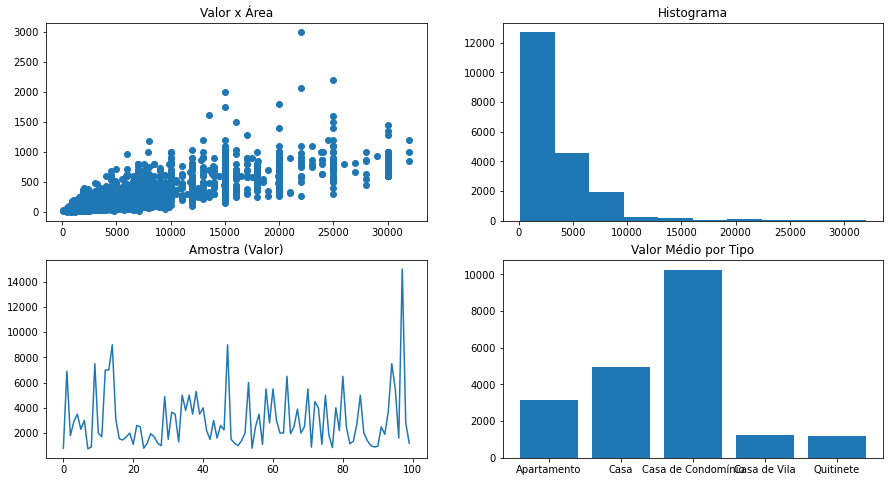

In [420]:
# visualiza todos os gráficos gerados na área previamente configurada
area

## Salvando a imagem gerada

In [421]:
# define um nome para a figura
# ajusta a definição da imagem
# estreita as margens brancas entre gráficos para melhor colagem da imagem
area.savefig('../dados/grafico.png', dpi=300, bbox_inches='tight')

### Rodando a imagem em Markdown
`![](../dados/grafico.png)`

![](../dados/grafico.png)

## Exercício

### Considere neste exercício o arquivo aluguel_amostra.csv e indique qual o código necessário para gerar os gráficos da figura a seguir:    
![](../dados/exercicio5.png)  

* Neste exercício, estamos apresentando o gráfico de pizza que pode ser obtido com a aplicação do método pie(), de matplotlib.
* Considere o código inicial abaixo para resolver o exercício:  

```
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7))
dados = pd.read_csv('dados/aluguel_amostra.csv', sep = ';')
```

In [422]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7))
dados_exercicio = pd.read_csv('../dados/aluguel_amostra.csv', sep = ';')

In [423]:
dados_exercicio.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento


Text(0.5, 1.0, 'Total de Imóveis por Tipo')

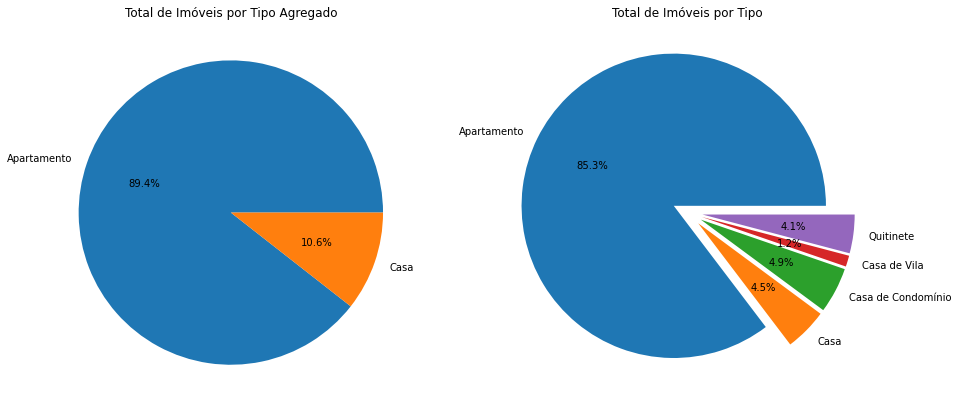

In [424]:
# cria a área
area = plt.figure()
# cria e dimensiona a variável dos gráficos
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
# seleciona os valores e rótulos
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
# passa os parâmetros para o gráfico e ajusta o valor exibido para % com uma casa decimal
g1.pie(valores, labels = label, autopct='%.1f%%')
# define o título
g1.set_title('Total de Imóveis por Tipo Agregado')
# seleciona os valores e rótulos
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
# passa os parâmetros para o gráfico e ajusta o valor exibido para % com uma casa decimal
# explode descola os valores do gráfico
g2.pie(valores, labels = label, autopct='%.1f%%', explode = (.1, .1, .1, .1, .1))
# define o título
g2.set_title('Total de Imóveis por Tipo')

## Extra com gráfico de pizza

### Analisando a variável bairros

In [425]:
dados_exercicio['Bairro'].unique()

array(['Recreio dos Bandeirantes', 'Maracanã', 'Leblon', 'São Conrado',
       'Tijuca', 'Cachambi', 'Glória', 'Engenho Novo', 'Flamengo',
       'Pechincha', 'Lagoa', 'Vaz Lobo', 'Copacabana', 'Curicica',
       'Zumbi', 'Barra da Tijuca', 'Vila Isabel', 'Ipanema', 'Gávea',
       'Laranjeiras', 'Vila Valqueire', 'Botafogo', 'Leme', 'Méier',
       'Rio Comprido', 'Catete', 'Jacarepaguá', 'Lapa', 'Irajá',
       'Lins de Vasconcelos', 'Vila da Penha', 'Grajaú',
       'Freguesia (Jacarepaguá)', 'Taquara', 'Realengo', 'Joá',
       'Jardim Botânico', 'Itanhangá', 'Ramos', 'Riachuelo',
       'Vargem Grande', 'Marechal Hermes', 'Bonsucesso',
       'Vicente de Carvalho', 'Centro', 'Todos os Santos',
       'Engenho de Dentro', 'Olaria', 'Santa Teresa', 'Urca', 'Anchieta',
       'Anil', 'Vila Kosmos', 'Cascadura', 'Jardim Guanabara',
       'Santo Cristo', 'Praça da Bandeira', 'Campo Grande', 'Pavuna',
       'Jardim América', 'Vargem Pequena', 'Humaitá',
       'São Francisco Xavier', 

### Selecionando somente alguns bairros 

In [426]:
bairros = ['Copacabana', 'Leblon', 'Flamengo', 'Botafogo', 'Lapa']
selecao = dados_exercicio['Bairro'].isin(bairros)
dados_exercicio = dados_exercicio[selecao]
dados_exercicio.head()
# note que agora o dataframe contem apenas os bairros da variável bairros

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento
12,Apartamento,Leblon,4,2,1,200,12000.0,2340.0,660.0,60.00,Apartamento
15,Apartamento,Copacabana,1,0,0,39,1800.0,490.0,71.0,46.15,Apartamento
18,Apartamento,Flamengo,3,1,1,250,8000.0,2000.0,580.0,32.00,Apartamento


### Agrupando os bairros

In [427]:
dados_exercicio.Bairro.value_counts()

Copacabana    1230
Leblon         579
Botafogo       432
Flamengo       331
Lapa            12
Name: Bairro, dtype: int64

### Definindo valores e rótulos do grafico de pizza

* gráficos de pizza recebem como valores apenas um array 1D
* portanto, selecionaremos apenas os valores da Series acima

In [428]:
valores = dados_exercicio.Bairro.value_counts().values
valores

array([1230,  579,  432,  331,   12], dtype=int64)

* como rótulos passaremos o index da Series

In [429]:
label = dados_exercicio.Bairro.value_counts().index
label

Index(['Copacabana', 'Leblon', 'Botafogo', 'Flamengo', 'Lapa'], dtype='object')

### Plotando o gráfico

#### 1º Método

([<matplotlib.patches.Wedge at 0x1eeb4f96fa0>,
 [Text(0.09036893457705213, 1.1965924350686028, 'Copacabana'),
  Text(-1.0210278962997765, -0.6304776244861137, 'Leblon'),
  Text(0.25196696403410873, -1.173248758377964, 'Botafogo'),
  Text(1.0899549417223942, -0.5019942479898871, 'Flamengo'),
  Text(1.1998722896876155, -0.017506811240171324, 'Lapa')],
 [Text(0.05271521183661374, 0.6980122537900183, '47.60%'),
  Text(-0.5955996061748695, -0.36777861428356623, '22.41%'),
  Text(0.14698072901989673, -0.6843951090538123, '16.72%'),
  Text(0.6358070493380632, -0.29282997799410077, '12.81%'),
  Text(0.6999255023177757, -0.010212306556766604, '0.46%')])

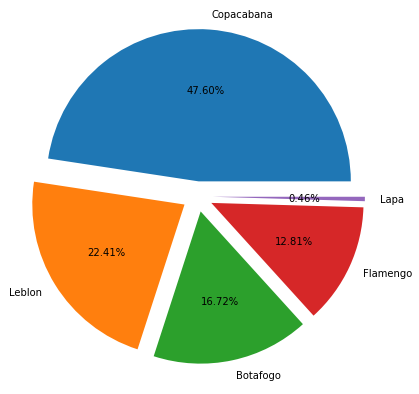

In [448]:
plt.pie(valores, labels=label, autopct='%.2f%%', explode=(.1, .1, .1, .1, .1))

#### 2º Método

Text(0.5, 1.0, 'Bairros Mais Conhecidos')

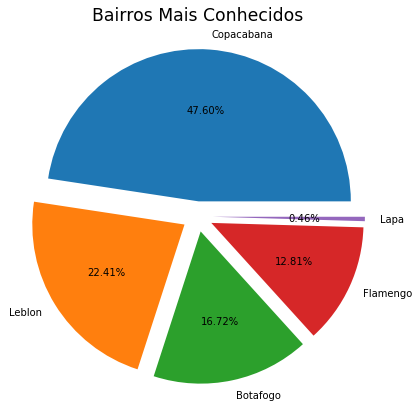

In [458]:
# define a área onde será plotado
grafico = plt.figure()
# cria um objeto do tipo sub-grafico
grafico_pizza = grafico.add_subplot()
# aplica para esse objeto o grafico de pizza
# com %, 2 casas decimais, e descola os valores
grafico_pizza.pie(valores, labels=label, autopct='%.2f%%', explode=(.1, .1, .1, .1, .1))
# acerta o título e o tamanho do título em extra grande
grafico_pizza.set_title('Bairros Mais Conhecidos', size='xx-large')